In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
uploaded = files.upload()

Saving test.data to test.data
Saving train.data to train.data


In [ ]:
df_train=pd.read_csv("/content/train.data")
df_test=pd.read_csv("/content/test.data")

# # Split the features from the label
# # Select rows with only class-1 and class-2 labels
# class_labels = ["class-1", "class-2"]

# df_train = df_train[df_train.iloc[:, -1].isin(class_labels)]
# y_train = df_train.iloc[:, -1].values
# X_train = df_train.iloc[:, :-1].values
# class_labels = ["class-1", "class-2"]


# # Map class labels to numeric values
# label_map = {"class-1": 0, "class-2": 1}


# # Check that feature and label data are correctly aligned
# assert len(X_train) == len(y_train)
# X_test = df_test.iloc[:, :-1].values
# y_test = df_test.iloc[:, -1].values






Accuracy: 100.0


<Figure size 720x432 with 0 Axes>

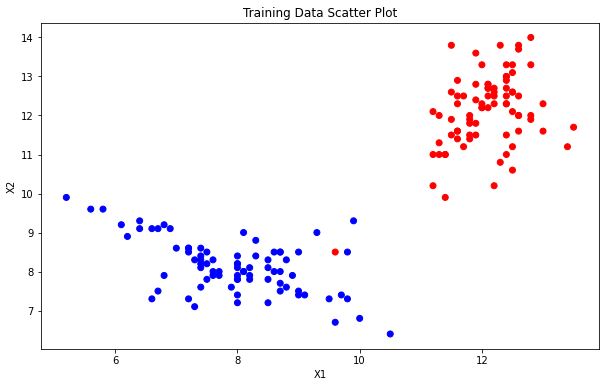

In [ ]:
##class 1 and 2
df_train=pd.read_csv("/content/train.data")
df_test=pd.read_csv("/content/test.data")

class Perceptron:

    def __init__(self, learning_rate=1, n_iters=20):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y_train])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X_train):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X_test):
        linear_output = np.dot(X_test, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return np.array([1 if i > 0 else 0 for i in y_predicted])

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

# Select rows with only class-1 and class-2 labels
class_labels = ["class-1", "class-2"]
df_train = df_train[df_train.iloc[:, -1].isin(class_labels)]
df_test = df_test[df_test.iloc[:, -1].isin(class_labels)]

# Split the features from the label
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].map({"class-1": 0, "class-2": 1}).values
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].map({"class-1": 0, "class-2": 1}).values

# Train the perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Predict on the test data and calculate accuracy
y_pred = perceptron.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy*100}")
plt.figure(figsize=(10, 6))

# Plot the decision boundary
plt.figure(figsize=(10, 6))
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1]
import matplotlib.pyplot as plt

# Plot the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training Data Scatter Plot')
plt.show()



[2 0 2 2 2 2 0 0 2 0 0 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 0 2 2 0 0 0 2 0 0 0 2
 2 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0 2 2 2 0 0 0 0 2 2 2 2 2 0 2 2 2 2 0 2 0
 2 0 0 0 0 0 2 2 0 2 0 0 0 2 2 0 0 0 0 2 2 0 0 0 0 2 2 2 0 2 0 0 2 2 2 2 2
 0 2 2 2 2 0 2 2 2 0 2 0 2 2 2 0 0 2 2 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0
 0 2 2 2 2 0 0 2 0 0 2 2]
[2 0 0 0 2 2 2 2 0 0 0 0 0 0 2 2 0 0 2 2 0 2 0 2 2 2 2 0 2 2 0 2 2 0 0 0 0
 2]
[2 0 2 2 2 2 0 0 2 0 0 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 0 2 2 0 0 0 2 0 0 0 2
 2 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0 2 2 2 0 0 0 0 2 2 2 2 2 0 2 2 2 2 0 2 0
 2 0 0 0 0 0 2 2 0 2 0 0 0 2 2 0 0 0 0 2 2 0 0 0 0 2 2 2 0 2 0 0 2 2 2 2 2
 0 2 2 2 2 0 2 2 2 0 2 0 2 2 2 0 0 2 2 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0
 0 2 2 2 2 0 0 2 0 0 2 2]
[2 0 0 0 2 2 2 2 0 0 0 0 0 0 2 2 0 0 2 2 0 2 0 2 2 2 2 0 2 2 0 2 2 0 0 0 0
 2]
Accuracy1: 100.0


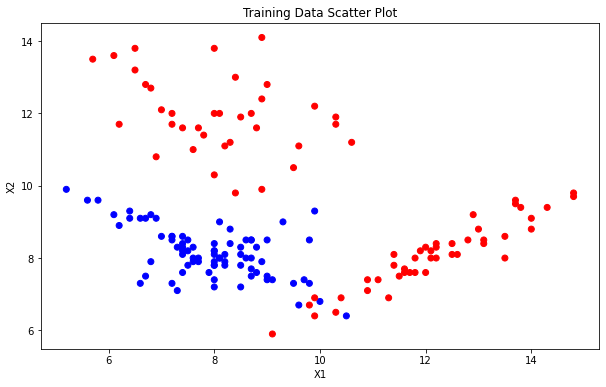

In [ ]:
##class 1 and 3
# Select rows with only class-1 and class-3 labels
df_train=pd.read_csv("/content/train.data")
df_test=pd.read_csv("/content/test.data")

class_labels = ["class-1", "class-3"]
df_train = df_train[df_train.iloc[:, -1].isin(class_labels)]
df_test = df_test[df_test.iloc[:, -1].isin(class_labels)]

# Split the features from the label
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].map({"class-1": 0, "class-3": 2}).values
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].map({"class-1": 0, "class-3": 2}).values
print (y_train)
print (y_test)
class Perceptron:

    def __init__(self, learning_rate=1, n_iters=20):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y_train])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X_train):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X_test):
        linear_output = np.dot(X_test, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return np.array([1 if i > 0 else 0 for i in y_predicted])

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

# Select rows with only class-1 and class-2 labels
class_labels = ["class-1", "class-3"]
df_train = df_train[df_train.iloc[:, -1].isin(class_labels)]
df_test = df_test[df_test.iloc[:, -1].isin(class_labels)]

# Split the features from the label
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].map({"class-1": 0, "class-3": 2}).values
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].map({"class-1": 0, "class-3": 2}).values
print (y_train)
print (y_test)
# Train the perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Predict on the test data and calculate accuracy
y_pred = perceptron.predict(X_test)
accuracy1 = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy1: {accuracy*100}")

# Plot the decision boundary
plt.figure(figsize=(10, 6))
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1]
import matplotlib.pyplot as plt

# Plot the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training Data Scatter Plot')
plt.show()

[1 2 1 1 1 2 2 2 2 1 1 1 1 2 2 1 1 2 2 1 2 1 2 2 2 2 2 1 2 1 2 1 2 1 1 1 1
 2 1]
Accuracy: 51.28205128205128


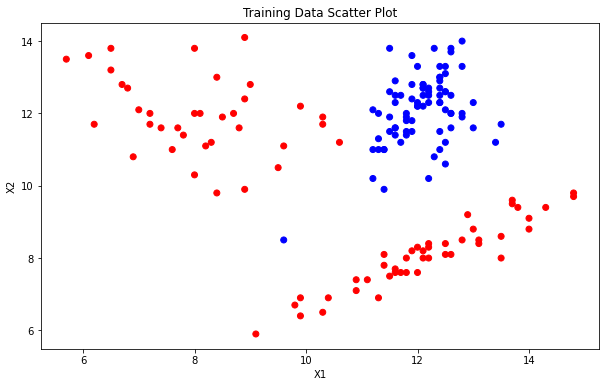

In [ ]:

df_train=pd.read_csv("/content/train.data")
df_test=pd.read_csv("/content/test.data")
#class 2 vs 3

# Split the features from the label
# Select rows with only class-2 and class-3 labels

class Perceptron:

    def __init__(self, learning_rate=1, n_iters=20):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        n_samples, n_features = X_train.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y_train])

        for _ in range(self.n_iters):

            for idx, x_i in enumerate(X_train):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X_test):
        linear_output = np.dot(X_test, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return np.array([1 if i > 0 else 0 for i in y_predicted])

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

# Select rows with only class-2 and class-3 labels
class_labels = ["class-2", "class-3"]
df_train = df_train[df_train.iloc[:, -1].isin(class_labels)]
df_test = df_test[df_test.iloc[:, -1].isin(class_labels)]


# Split the features from the labels
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].map({"class-2": 1, "class-3": 2}).values
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].map({"class-2": 1, "class-3": 2}).values
print (y_test)
# Train the perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# Predict on the test data and calculate accuracy
y_pred = perceptron.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy*100}")

# Plot the decision boundary
plt.figure(figsize=(10, 6))
x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1]
import matplotlib.pyplot as plt

# Plot the training data
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Training Data Scatter Plot')
plt.show()



In [ ]:
import numpy as np
import pandas as pd

##one vs all

# Define Perceptron class
class Perceptron:
    def __init__(self, eta, n_iter):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)


# Load data
df_train = pd.read_csv("/content/train.data")
df_test = pd.read_csv("/content/test.data")

# Preprocess the data
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1]
#y_train = df_train["label"].values
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1]
#X_test = df_test.drop(columns=["label"]).values
#y_test = df_test["label"].values

# Define classes
classes = ['class-1', 'class-2', 'class-3']

# Train Perceptron for each class
perceptrons = {}
for cls in classes:
    y_train_binary = np.where(y_train == cls, 1, -1)
    perceptron = Perceptron(eta=0.1, n_iter=100)
    perceptron.fit(X_train, y_train_binary)
    perceptrons[cls] = perceptron

# Predict class labels for test set
y_pred = np.zeros(len(y_test), dtype=object)
for i, x in enumerate(X_test):
    scores = [perceptrons[cls].net_input(x) for cls in classes]
    y_pred[i] = classes[np.argmax(scores)]

# Calculate accuracy
accuracy = np.mean(y_pred == y_test) *100
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 91.38
